In [1]:
from glob import glob
import pandas as pd
import numpy as np
import os
import keras
import cv2
from keras.regularizers import l2
from keras.layers import Dropout, Flatten, TimeDistributed, RepeatVector
from keras.layers import Dense, Activation,  LSTM, concatenate, Concatenate, Conv2D, Conv2DTranspose
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

2022-09-29 18:04:47.822272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 18:04:48.033139: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-29 18:04:48.083117: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 18:04:48.965524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
folder = "/home/linsea/motion_ws/src/motion_prediction/data/ETH/"

file_num = 7122
test_rate = 0.2
map_size = 20
test_num = int(file_num * test_rate)
print(test_num)
index = 0
Map_train, Map_test = [], []


1424


In [3]:
img = cv2.imread('/home/linsea/motion_ws/src/motion_prediction/data/ETH/map.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
lim_x = img.shape[0]
lim_y = img.shape[1]
img_feature = []

for i in range(0, lim_x - map_size):
  for j in range(0, lim_y - map_size):
    crop_img = img[i:i+map_size, j:j+map_size] / 255
    img_feature.append(crop_img)

img_feature = np.array(img_feature)
# img_feature = np.random.shuffle(img_feature)
    

In [4]:
img_feature.shape

(285200, 20, 20)

In [5]:
test_num = int(img_feature.shape[0] * test_rate)
for i in range(len(img_feature)):
  index +=1
  if index % 1000 == 0:
    print(index)
  if i > test_num:
    Map_train.append(img_feature[i])
  else:
    Map_test.append(img_feature[i])
Map_train = np.array(Map_train)
Map_test = np.array(Map_test)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [6]:
print('map_info:\t\t', Map_train.shape)
print('map test info:\t\t', Map_test.shape)

map_info:		 (228159, 20, 20)
map test info:		 (57041, 20, 20)


In [7]:
epochs = 10
lr = 0.001
batch_size = 1024
regulizer = l2(lr)

In [8]:
map_input = keras.Input(shape=( 20, 20,1), name= 'map')
ae = Conv2D( 64, 5, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(map_input)
ae = Conv2D( 32, 3, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(ae)
ae = Conv2D(  8, 3, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(ae)
ae = Dense( 64, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer,)(ae)

ae = Dense( 64, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer,)(ae)
# ae = Conv2DTranspose(  8, 1, activation='relu', kernel_regularizer=regulizer,\
#              bias_regularizer=regulizer, strides=2, padding="same")(ae)
ae = Conv2DTranspose(  8, 3, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(ae)
ae = Conv2DTranspose( 32, 3, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(ae)
ae = Conv2DTranspose( 64, 5, activation='relu', kernel_regularizer=regulizer,\
             bias_regularizer=regulizer, strides=2, padding="same")(ae)
             
ae = Conv2D(1, (5, 5), activation="sigmoid")(ae)

model = keras.Model(inputs = [map_input], outputs = [ae])

model.compile(
    optimizer = Adam(lr),
    loss=keras.losses.MeanSquaredError(),
)

model.summary()


2022-09-29 18:04:56.308759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.317041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.318406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.320557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 map (InputLayer)            [(None, 20, 20, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 8)           2312      
                                                                 
 dense (Dense)               (None, 3, 3, 64)          576       
                                                                 
 dense_1 (Dense)             (None, 3, 3, 64)          4160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 8)          4616  

2022-09-29 18:04:56.321532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.322149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.322663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.795564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 18:04:56.796165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Non-trainable params: 0
_________________________________________________________________


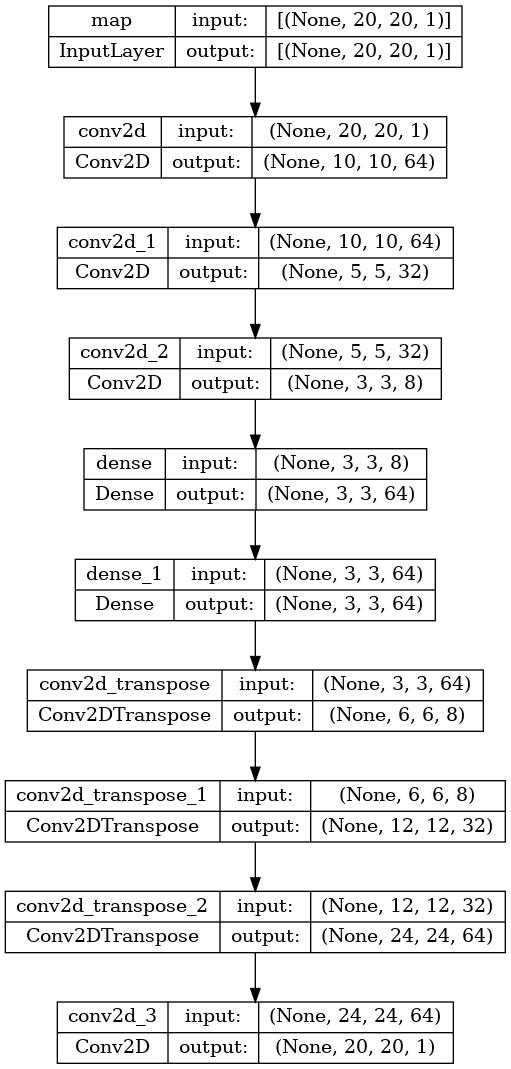

In [9]:
keras.utils.plot_model(model, "AE.png", show_shapes=True)

In [10]:
map_data = Map_train

model.fit(
  x=map_data,
  y=map_data,
  epochs = epochs,
  batch_size = batch_size,
  validation_split=0.2,
)


Epoch 1/10


2022-09-29 18:05:00.280100: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-09-29 18:05:01.735080: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


179/179 [==============================] - 15s 63ms/step - loss: 0.0886 - val_loss: 0.0354
Epoch 2/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0177 - val_loss: 0.0301
Epoch 3/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0161 - val_loss: 0.0298
Epoch 4/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0161 - val_loss: 0.0299
Epoch 5/10
179/179 [==============================] - 11s 60ms/step - loss: 0.0160 - val_loss: 0.0299
Epoch 6/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0160 - val_loss: 0.0298
Epoch 7/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0160 - val_loss: 0.0299
Epoch 8/10
179/179 [==============================] - 10s 59ms/step - loss: 0.0160 - val_loss: 0.0298
Epoch 9/10
179/179 [==============================] - 11s 59ms/step - loss: 0.0160 - val_loss: 0.0298
Epoch 10/10
179/179 [==============================] - 10s 59ms/step - loss: 0.0160 - val_los

In [11]:
preds = model.predict(Map_test)
loss_metrics = model.evaluate(Map_test, Map_test)

1783/1783 [==============================] - 6s 3ms/step - loss: 2.7763e-04


In [ ]:
model.save('AE.h5')


In [18]:
test = Map_test[0].reshape(1,20,20,1)

In [21]:
print(test.shape)

(1, 20, 20, 1)


In [22]:
prediction = model(test)